In [2]:
import requests as requests

code_commune = 75119

def fetch(codeC):
    response = requests.get(f"http://api.cquest.org/dvf?code_commune={codeC}")
    data = response.json()

    return data

data = fetch(code_commune)

In [3]:
import pandas as pd

df = pd.DataFrame(data["resultats"])

df.describe()


,valeur_fonciere,surface_lot_1,surface_lot_2,surface_lot_3,surface_lot_4,surface_lot_51,surface_relle_bati,nombre_pieces_principales,surface_terrain,lat,lon
count,2.147200e+04,6775.000000,2441.000000,125.000000,16.000000,8.000000,19487.000000,19487.000000,2367.000000,21366.000000,21366.000000
mean,2.028650e+06,61.737374,52.846952,62.338960,108.973750,115.827500,40.951403,1.421101,1522.596536,48.884672,2.381009
std,6.212741e+06,157.161864,31.390053,56.129242,129.632421,163.618604,212.894419,1.375293,2062.862926,0.006605,0.008310
min,0.000000e+00,0.000000,1.200000,2.600000,8.100000,6.800000,0.000000,0.000000,1.000000,48.872992,2.365177
25%,1.960000e+05,25.840000,33.400000,32.360000,30.817500,30.537500,0.000000,0.000000,272.500000,48.878525,2.374327
50%,3.450000e+05,39.350000,47.730000,57.080000,70.610000,58.790000,29.000000,1.000000,830.000000,48.884834,2.379937
75%,6.272000e+05,59.835000,67.050000,75.930000,123.917500,100.557500,52.000000,2.000000,1641.000000,48.890326,2.386427
max,1.164500e+08,3791.900000,742.600000,502.920000,502.920000,502.920000,14400.000000,11.000000,13801.000000,48.901837,2.409224


In [4]:
df

,code_service_ch,reference_document,articles_1,articles_2,articles_3,articles_4,articles_5,numero_disposition,date_mutation,nature_mutation,...,type_local,identifiant_local,surface_relle_bati,nombre_pieces_principales,nature_culture,nature_culture_speciale,surface_terrain,lat,lon,geom
0,None,None,None,None,None,None,None,000001,2016-08-05,Vente,...,Appartement,None,23.0,2.0,None,None,NaN,48.886245,2.366663,"{'type': 'Point', 'coordinates': [2.366663, 48..."
1,None,None,None,None,None,None,None,000001,2018-11-09,Vente,...,Appartement,None,23.0,1.0,None,None,NaN,48.886245,2.366663,"{'type': 'Point', 'coordinates': [2.366663, 48..."
2,None,None,None,None,None,None,None,000001,2015-07-03,Vente,...,Appartement,None,20.0,1.0,S,None,148.0,NaN,NaN,None
3,None,None,None,None,None,None,None,000001,2015-07-03,Vente,...,Appartement,None,9.0,1.0,S,None,148.0,NaN,NaN,None
4,None,None,None,None,None,None,None,000001,2015-07-03,Vente,...,Appartement,None,21.0,1.0,S,None,148.0,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21513,None,None,None,None,None,None,None,000001,2017-10-25,Vente,...,Appartement,None,41.0,1.0,None,None,NaN,48.877411,2.371552,"{'type': 'Point', 'coordinates': [2.371552, 48..."
21514,None,None,None,None,None,None,None,000001,2016-07-06,Vente,...,Appartement,None,67.0,3.0,None,None,NaN,48.877109,2.371931,"{'type': 'Point', 'coordinates': [2.371931, 48..."
21515,None,None,None,None,None,None,None,000001,2016-07-06,Vente,...,Dépendance,None,0.0,0.0,None,None,NaN,48.877109,2.371931,"{'type': 'Point', 'coordinates': [2.371931, 48..."
21516,None,None,None,None,None,None,None,000001,2016-09-15,Vente,...,Appartement,None,65.0,3.0,None,None,NaN,48.877109,2.371931,"{'type': 'Point', 'coordinates': [2.371931, 48..."


In [5]:
df["type_local"].value_counts()

type_local
Appartement                                 12224
Dépendance                                   5741
Local industriel. commercial ou assimilé     1380
Maison                                        144
Name: count, dtype: int64

In [6]:
print(df.nombre_pieces_principales.unique())
print(df.type_local.unique())

[ 2.  1.  0. nan  3.  4.  5.  6.  7.  8. 11.]
['Appartement' 'Local industriel. commercial ou assimilé' 'Dépendance'
 None 'Maison']


np.int64(46)

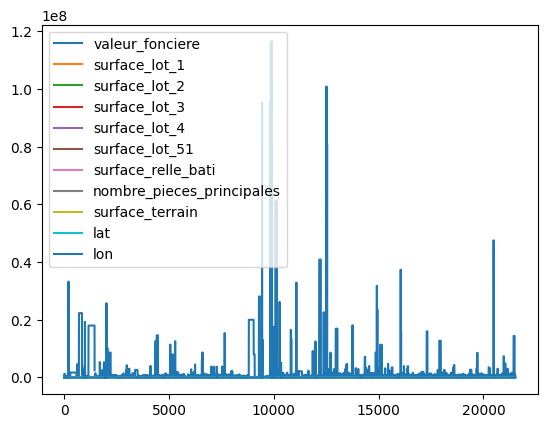

In [7]:
import matplotlib.pyplot as plt

df.plot()
df.valeur_fonciere.isnull().sum()

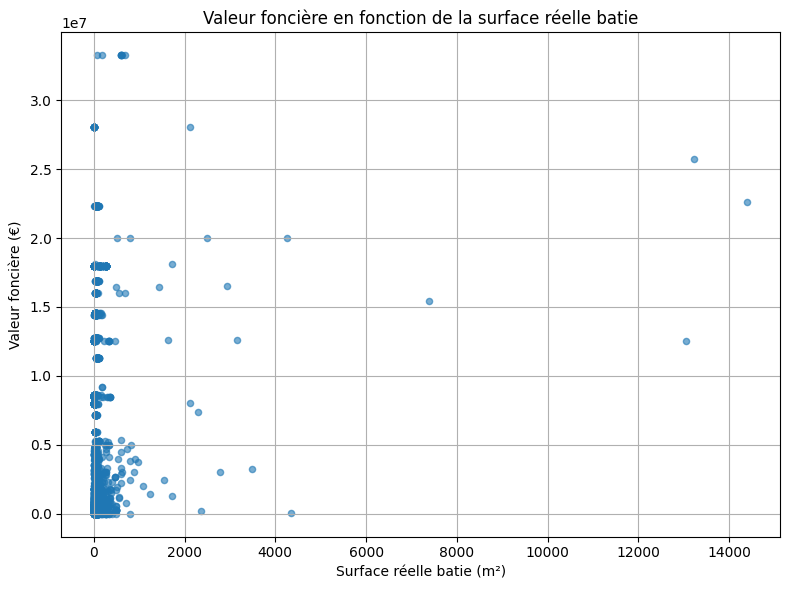

In [8]:
# scatter plot valeur_fonciere vs surface_terrain
sub = df[['surface_relle_bati', 'valeur_fonciere']].dropna()
sub = sub[(sub['surface_relle_bati'] > 0) & (sub['valeur_fonciere'] > 0)]

plt.figure(figsize=(8, 6))
plt.scatter(sub['surface_relle_bati'], sub['valeur_fonciere'], alpha=0.6, s=20)
plt.xlabel("Surface réelle batie (m²)")
plt.ylabel("Valeur foncière (€)")
plt.title("Valeur foncière en fonction de la surface réelle batie")
plt.grid(True)
# Si les valeurs sont très dispersées, décommentez la ligne suivante pour une échelle logarithmique en ordonnée :
# plt.yscale('log')
plt.tight_layout()
plt.show()

In [ ]:
import folium

m = folium.Map(location=[44.865949, -0.575702], zoom_start=12)

m